In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
df = pd.read_csv('laliga_optimized.csv')
df.head()

,id,season,division,round,localTeam,visitorTeam,localGoals,visitorGoals,date,result,...,local_3streak,visitor_3streak,local_5streak,visitor_5streak,last_1ra_loc,last_1ra_vis,Rk_loc,Rk_vis,last_top6_loc,last_top6_vis
0,11702,1987-88,1,1,Atletico de Bilbao,Mallorca,2,1,1987-08-29,2,...,0.0,0.0,0.0,0.0,1,1,1.0,1.0,0,0
1,11703,1987-88,1,1,Espanol,Celta de Vigo,0,1,1987-08-29,0,...,0.0,0.0,0.0,0.0,1,1,1.0,1.0,0,0
2,11704,1987-88,1,1,Sporting de Gijon,Valladolid,0,0,1987-08-29,1,...,0.0,0.0,0.0,0.0,1,1,1.0,1.0,0,0
3,11705,1987-88,1,1,Valencia,Logrones,2,0,1987-08-29,2,...,0.0,0.0,0.0,0.0,1,1,1.0,1.0,0,0
4,11706,1987-88,1,1,Atletico de Madrid,Sabadell,1,0,1987-08-30,2,...,0.0,0.0,0.0,0.0,1,1,1.0,1.0,0,0


In [3]:
df.dtypes

id                   int64
season              object
division             int64
round                int64
localTeam           object
visitorTeam         object
localGoals           int64
visitorGoals         int64
date                object
result               int64
T1PliS             float64
T1PviS             float64
T2PliS             float64
T2PviS             float64
total_punts_loc    float64
total_punts_vis    float64
month                int64
day_of_week          int64
GoalsliS           float64
GoalsviS           float64
local_3streak      float64
visitor_3streak    float64
local_5streak      float64
visitor_5streak    float64
last_1ra_loc         int64
last_1ra_vis         int64
Rk_loc             float64
Rk_vis             float64
last_top6_loc        int64
last_top6_vis        int64
dtype: object

In [4]:
df.shape

(11020, 30)

In [5]:
df.drop(['id','division'], axis=1, inplace=True)
df.drop(['date'], axis=1, inplace=True)

In [7]:
df.head()

,season,round,localTeam,visitorTeam,localGoals,visitorGoals,result,T1PliS,T1PviS,T2PliS,...,local_3streak,visitor_3streak,local_5streak,visitor_5streak,last_1ra_loc,last_1ra_vis,Rk_loc,Rk_vis,last_top6_loc,last_top6_vis
0,1987-88,1,Atletico de Bilbao,Mallorca,2,1,2,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1,1,1.0,1.0,0,0
1,1987-88,1,Espanol,Celta de Vigo,0,1,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1,1,1.0,1.0,0,0
2,1987-88,1,Sporting de Gijon,Valladolid,0,0,1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1,1,1.0,1.0,0,0
3,1987-88,1,Valencia,Logrones,2,0,2,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1,1,1.0,1.0,0,0
4,1987-88,1,Atletico de Madrid,Sabadell,1,0,2,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1,1,1.0,1.0,0,0


<Axes: xlabel='localTeam'>

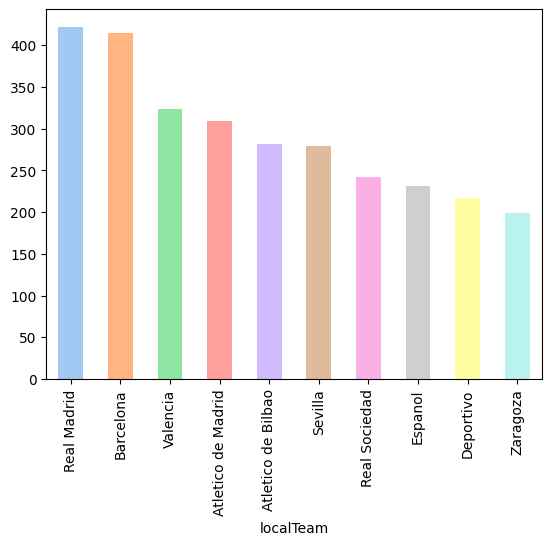

In [8]:
#teams with more wins at home
df[df['result']==2].groupby('localTeam')['result'].count().sort_values(ascending=False).head(10).plot(kind='bar', color=sns.color_palette('pastel'))

In [9]:
df['season'].unique()

array(['1987-88', '1988-89', '1989-90', '1990-91', '1991-92', '1992-93',
       '1993-94', '1994-95', '1997-98', '1998-99', '1999-00', '2000-01',
       '2001-02', '2002-03', '2003-04', '2004-05', '2005-06', '2006-07',
       '2007-08', '2008-09', '2009-10', '2010-11', '2011-12', '2012-13',
       '2013-14', '2014-15', '2015-16', '2016-17', '2017-18'],
      dtype=object)

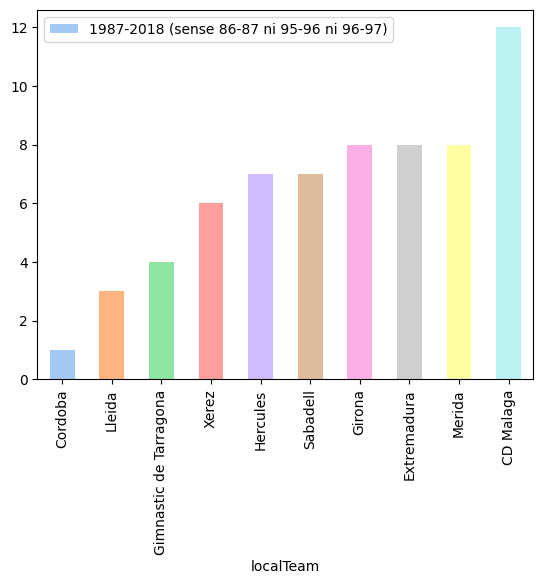

In [10]:
#Plot the teams with less wins at home and add a legend saying: 1987-2018 (without 86-87, 95-96 and 96-97)
df[df['result']==2].groupby('localTeam')['result'].count().sort_values(ascending=True).head(10).plot(kind='bar', color=sns.color_palette('pastel'))
plt.legend(['1987-2018 (sense 86-87 ni 95-96 ni 96-97)'])

<Axes: >

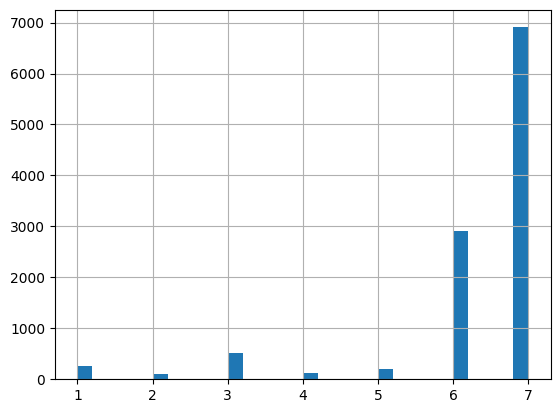

In [11]:
#Plot the distribution of days played for each match
df['day_of_week'].hist(bins=30)

Text(0.5, 1.0, 'Clubs with more season in La liga (from 1987-2018 saved leagues)')

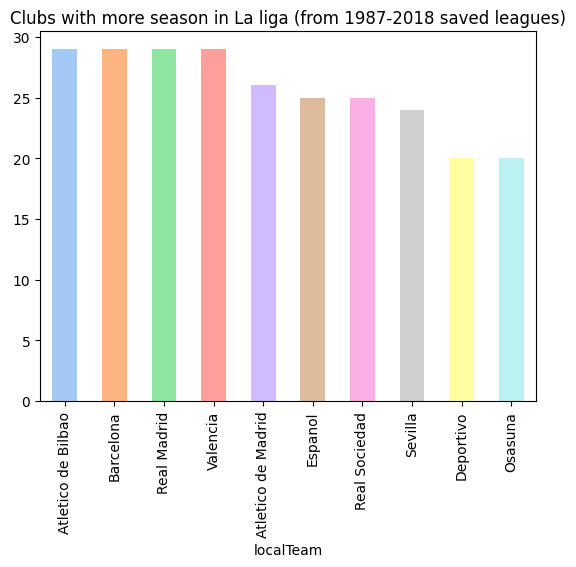

In [12]:
#Clubs with more seasons in La liga (from 1987-2018 saved leagues)
(df.groupby('localTeam')['last_1ra_loc'].sum()/19).sort_values(ascending=False).head(10).plot(kind='bar', color=sns.color_palette('pastel'))
plt.title('Clubs with more season in La liga (from 1987-2018 saved leagues)')

Text(0.5, 1.0, 'Clubs with less seasons in La Liga (from 1987-2018 saved leagues)')

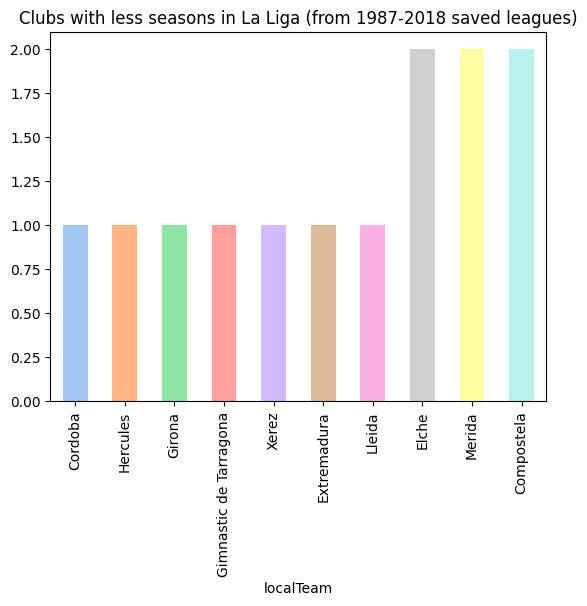

In [13]:
#Clubs with less seasons in La Liga (from 1987-2018 saved leagues)
(df.groupby('localTeam')['last_1ra_loc'].sum()/19 + 1).sort_values(ascending=True).head(10).plot(kind='bar', color=sns.color_palette('pastel'))
plt.title('Clubs with less seasons in La Liga (from 1987-2018 saved leagues)')

c:\Users\genis\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\genis\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\genis\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


result
2    48.711434
1    25.852995
0    25.435572
Name: count, dtype: float64

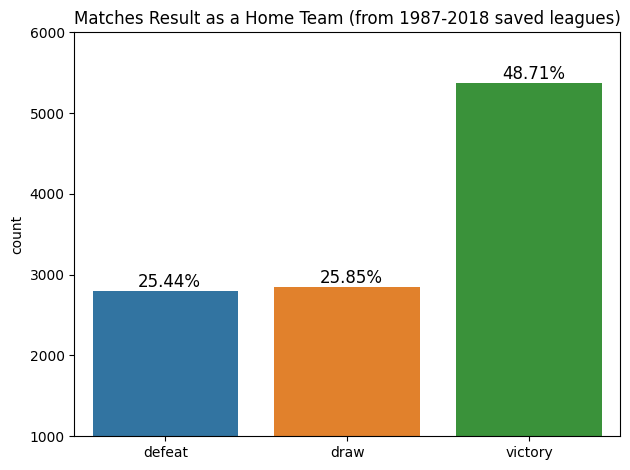

In [36]:
#we add to the plot the percentage of each result
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})
ax = sns.countplot(x='result', data=df)
plt.xticks([0, 1, 2], ['defeat', 'draw', 'victory'])
plt.title('Matches Result as a Home Team (from 1987-2018 saved leagues)')
plt.xlabel('')  # Remove the x-axis label
#we add to the plot the percentage of each result
for p in ax.patches:
    ax.annotate('{:.2f}%'.format(p.get_height()*100/len(df)), (p.get_x()+0.25, p.get_height()+50), fontsize=12)
plt.ylim(1000, 6000)
    
df['result'].value_counts()*100/len(df)


Unbalanced classes!! We see that approximately class 2 is twice as much as 0 and 1. This means that the teams as local usually win more than lose or tie, and win approximately the same as the defeats + draws at home.

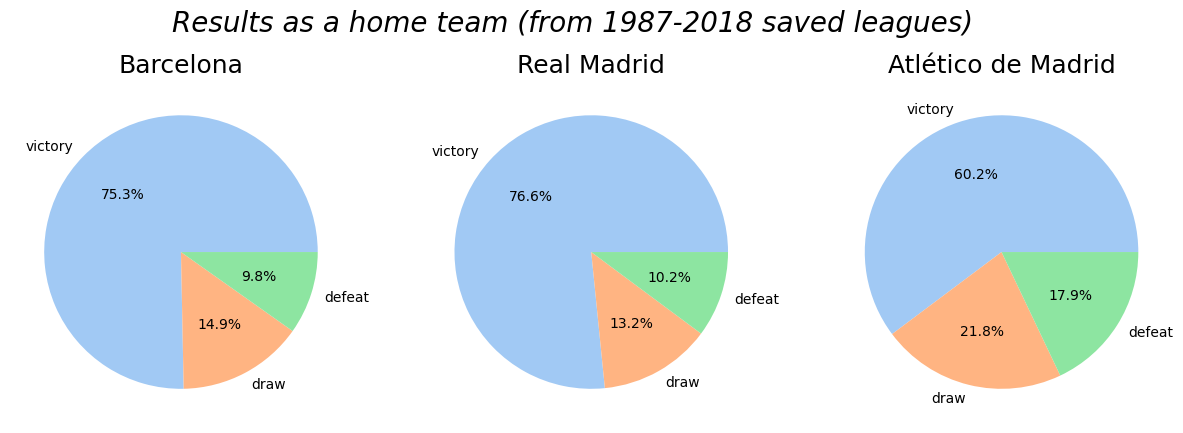

In [24]:
#We are going to analyze the percentage of victories, defeats and draws as local teams of the 3 best teams 
# in the league (Barça, Madrid and Atletico)

ll_top3 = ['Barcelona', 'Real Madrid', 'Atletico de Madrid']
df_top3 = df[df['localTeam'].isin(ll_top3)]

v1 = df[df['localTeam'] == 'Barcelona']['result'].value_counts().reindex([2,1,0])*100/len(df[df['localTeam'] == 'Barcelona'])
v2 = df[df['localTeam'] == 'Real Madrid']['result'].value_counts().reindex([2,1,0])*100/len(df[df['localTeam'] == 'Real Madrid'])
v3 = df[df['localTeam'] == 'Atletico de Madrid']['result'].value_counts().reindex([2,1,0])*100/len(df[df['localTeam'] == 'Atletico de Madrid'])

#3 pie plots with the results of the 3 teams
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.pie(v1, labels=['victory','draw','defeat'], autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Barcelona', fontsize=18)
plt.subplot(1,3,2)
plt.pie(v2, labels=['victory','draw','defeat'], autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Real Madrid', fontsize=18)
plt.subplot(1,3,3)
plt.pie(v3, labels=['victory','draw','defeat'], autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Atlético de Madrid', fontsize=18)
plt.suptitle('Results as a home team (from 1987-2018 saved leagues)', fontsize=20, style='italic')
plt.show()



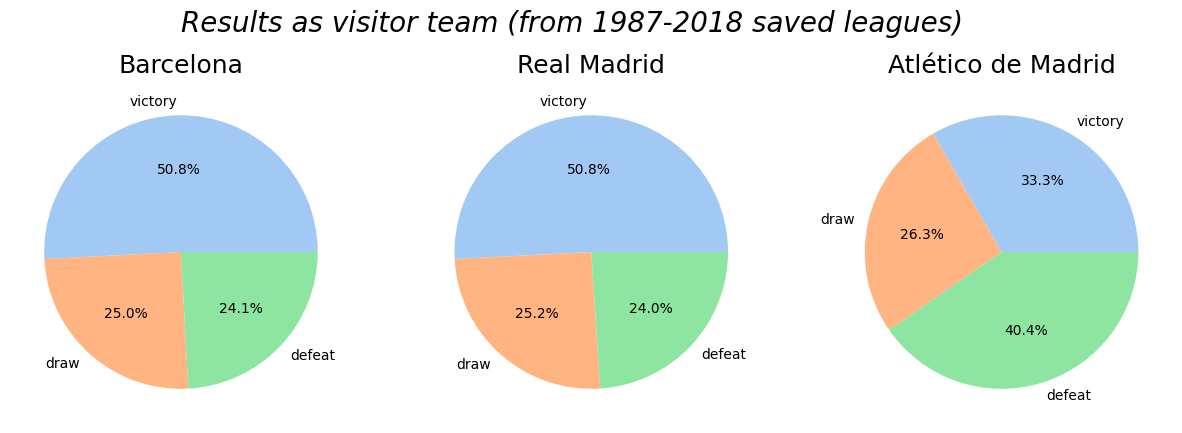

In [23]:
#The result in favor of the visitor is when result=0
v1 = df[df['visitorTeam'] == 'Barcelona']['result'].value_counts().reindex([0, 1, 2])*100/len(df[df['visitorTeam'] == 'Barcelona'])
v2 = df[df['visitorTeam'] == 'Real Madrid']['result'].value_counts().reindex([0, 1, 2])*100/len(df[df['visitorTeam'] == 'Real Madrid'])
v3 = df[df['visitorTeam'] == 'Atletico de Madrid']['result'].value_counts().reindex([0, 1, 2])*100/len(df[df['visitorTeam'] == 'Atletico de Madrid'])


plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.pie(v1, labels = ['victory','draw','defeat'], autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Barcelona', fontsize=18)
plt.subplot(1,3,2)
plt.pie(v2, labels=['victory','draw','defeat'], autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Real Madrid', fontsize=18)
plt.subplot(1,3,3)
plt.pie(v3, labels=['victory','draw','defeat'], autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Atlético de Madrid', fontsize=18)
plt.suptitle('Results as visitor team (from 1987-2018 saved leagues)', fontsize=20)

plt.suptitle('Results as visitor team (from 1987-2018 saved leagues)', fontsize=20, style='italic')

plt.show()

(900.0, 2600.0)

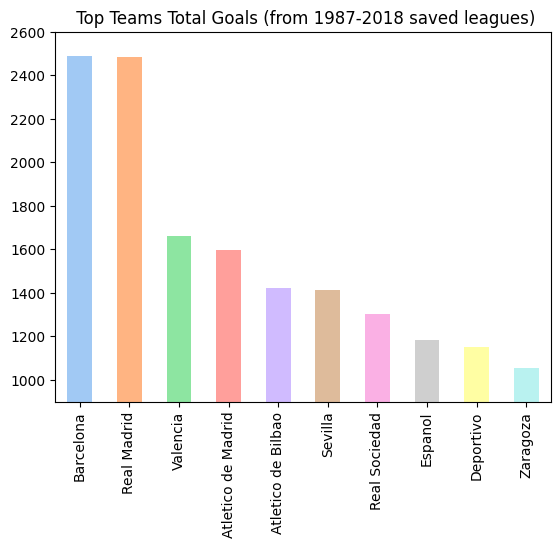

In [30]:
#We will analyze the goals in favor of each team. We will add the goals of the last round plus the accumulated goals in that round.
# We add all the seasons. We also create an auxiliary df with only the last round of each season. 

df_aux_round38 = df[df['round'] == 38]
teams_total_goals_df = df_aux_round38.groupby('localTeam')['localGoals'].sum().add(df_aux_round38.groupby('localTeam')['GoalsliS'].sum()) \
    .add(df_aux_round38.groupby('visitorTeam')['visitorGoals'].sum().add(df_aux_round38.groupby('visitorTeam')['GoalsviS'].sum()))
teams_total_goals_df.sort_values(ascending=False).head(10).plot(kind='bar', color=sns.color_palette('pastel'))
plt.title(' Top Teams Total Goals (from 1987-2018 saved leagues)')
plt.ylim(900, 2600)

Text(0.5, 1.0, ' Teams with less total Goals (from 1987-2018 saved leagues)')

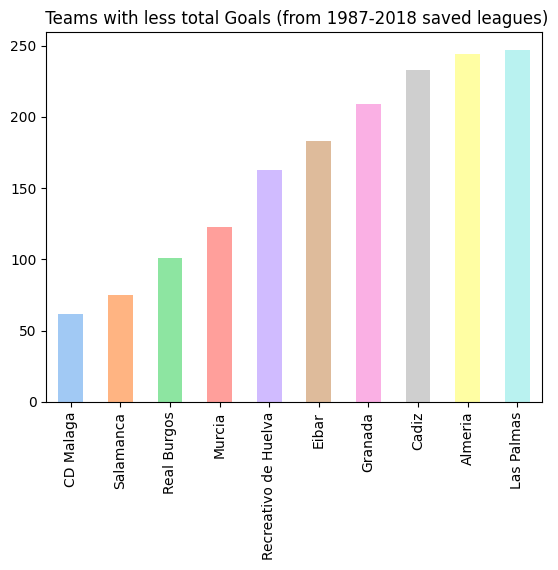

In [18]:
teams_total_goals_df.sort_values(ascending=True).head(10).plot(kind='bar', color=sns.color_palette('pastel'))
plt.title(' Teams with less total Goals (from 1987-2018 saved leagues)')

In [20]:
total_glocal = df_aux_round38.groupby('localTeam')['localGoals'].sum().add(df_aux_round38.groupby('localTeam')['GoalsliS'].sum()).sum()
total_gvisitant = df_aux_round38.groupby('visitorTeam')['visitorGoals'].sum().add(df_aux_round38.groupby('visitorTeam')['GoalsviS'].sum()).sum()
print('Total gols a favor locals: ', total_glocal, 'vs Total gols a favor visitants: ', total_gvisitant)

Total gols a favor locals:  14734.0 vs Total gols a favor visitants:  14139.0
